In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('./data/2015_Nepal_Earthquake_en/2015_Nepal_Earthquake_en_CF_labeled_data.tsv', sep='\t', header=0)
data = data.append(pd.read_csv('./data/2015_Cyclone_Pam_en/2015_Cyclone_Pam_en_CF_labeled_data.tsv', sep='\t', header=0))
data = data.append(pd.read_csv('./data/2014_Philippines_Typhoon_Hagupit_en/2014_Philippines_Typhoon_Hagupit_en_CF_labeled_data.tsv', sep='\t', header=0))
data = data.append(pd.read_csv('./data/2014_Pakistan_floods/2014_Pakistan_floods_CF_labeled_data.tsv', sep='\t', header=0))
data = data.append(pd.read_csv('./data/2014_India_floods/2014_India_floods_CF_labeled_data.tsv', sep='\t', header=0))
data = data.append(pd.read_csv('./data/2014_Hurricane_Odile_Mexico_en/2014_Hurricane_Odile_Mexico_en_CF_labeled_data.tsv', sep='\t', header=0))
data = data.append(pd.read_csv('./data/2014_Chile_Earthquake_en/2014_Chile_Earthquake_en_CF_labeled_data.tsv', sep='\t', header=0))
data = data.append(pd.read_csv('./data/2014_California_Earthquake/2014_California_Earthquake_CF_labeled_data.tsv', sep='\t', header=0))
data = data.append(pd.read_csv('./data/2013_Pakistan_eq/2013_Pakistan_eq_CF_labeled_data.tsv', sep='\t', header=0))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17382 entries, 0 to 1880
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    17382 non-null  object
 1   tweet_text  17382 non-null  object
 2   label       17382 non-null  object
dtypes: object(3)
memory usage: 543.2+ KB


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17382 entries, 0 to 1880
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    17382 non-null  object
 1   tweet_text  17382 non-null  object
 2   label       17382 non-null  object
dtypes: object(3)
memory usage: 543.2+ KB


<h1>Data exploratory analysis</h1>

In [5]:
data['label'].value_counts()

other_useful_information                             5165
donation_needs_or_offers_or_volunteering_services    2452
injured_or_dead_people                               2321
not_related_or_irrelevant                            2230
sympathy_and_emotional_support                       1887
infrastructure_and_utilities_damage                  1394
caution_and_advice                                   1011
displaced_people_and_evacuations                      547
missing_trapped_or_found_people                       375
Name: label, dtype: int64

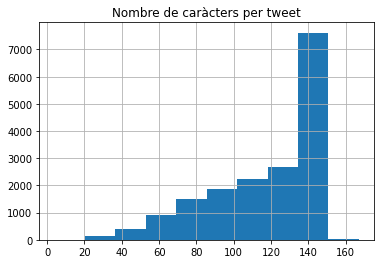

In [6]:
data['tweet_text'].str.len().hist()
plt.title('Nombre de caràcters per tweet')
plt.show()

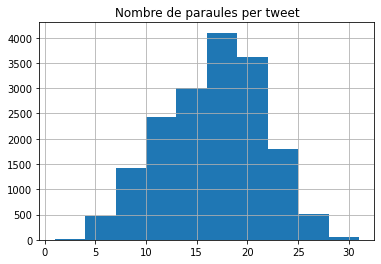

In [7]:
data['tweet_text'].str.split().map(lambda x: len(x)).hist()
plt.title('Nombre de paraules per tweet')
plt.show()

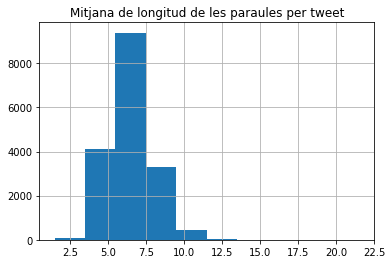

In [8]:
data['tweet_text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title('Mitjana de longitud de les paraules per tweet')
plt.show()

<h2> Netegem els tweets</h2>

In [9]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

cleaned_tweets = []
for tweet in data['tweet_text']:
    clean_tweet = []
    for word in tweet.split():
        if word not in stopwords and not word.startswith('@') and not 'http' in word and word != 'RT':
            clean_tweet.append(word.lower())
    cleaned_tweets.append(' '.join(clean_tweet))
data['tweet_text'] = cleaned_tweets

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xoelr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


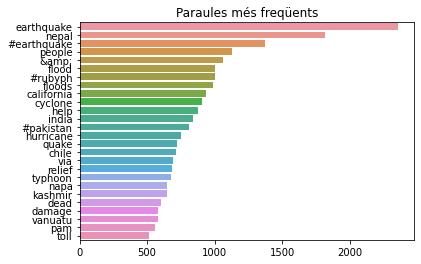

In [10]:
from collections import Counter


#Creem el corpus
text = data['tweet_text'].str.split().values.tolist()
corpus = [word for i in text for word in i]

counter = Counter(corpus)
most = counter.most_common()
x = []
y = []

for word, count in most[:30]:
    if(word not in stopwords and word != '-'):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y, y=x)
plt.title('Paraules més freqüents')
plt.show()

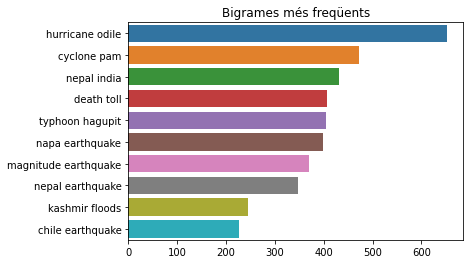

In [11]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

top_n_bigrams=get_top_ngram(data['tweet_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.title('Bigrames més freqüents')
plt.show()

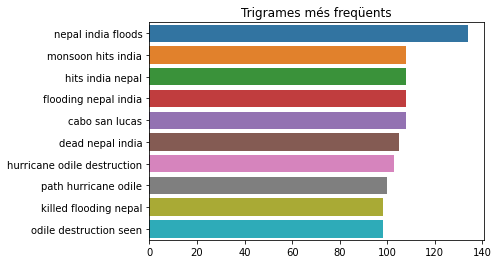

In [12]:
top_tri_grams=get_top_ngram(data['tweet_text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)
plt.title('Trigrames més freqüents')
plt.show()

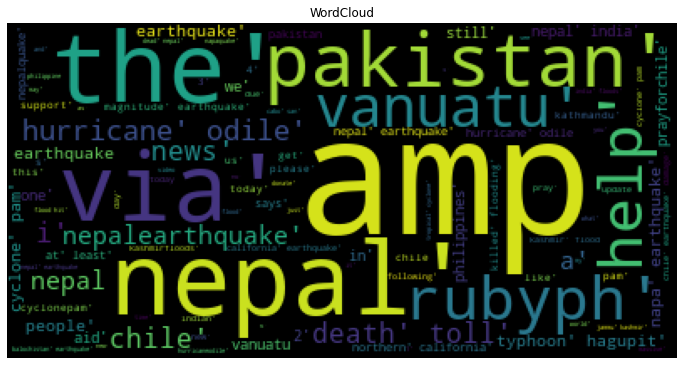

In [13]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, max_words = 100)
wordcloud = wordcloud.generate(str(corpus))

fig = plt.figure(1, figsize=(12,12))
plt.axis('off')
plt.title('WordCloud')
plt.imshow(wordcloud)
plt.show()

<h1>Preprocessament de tweets<h1>

In [14]:
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))
preprocessed_tweets = []

for tweet in data['tweet_text']:
    #Remove extra spaces
    tweet = re.sub('\s+', " ", tweet)
    #Remove punctuation
    tweet = re.sub("[^-9A-Za-z ]", "", tweet)
    #tokenize
    tokenizer = TweetTokenizer()
    tweet = tokenizer.tokenize(tweet)
    #Remove stopwords
    tweet = [word for word in tweet if word not in stopwords]
    #Lemmatize
    wn = WordNetLemmatizer()
    tweet = [wn.lemmatize(word) for word in tweet]
    
    preprocessed_tweets.append(" ".join(tweet))
data['tweet_text'] = preprocessed_tweets
data.to_csv('data/preprocessed_tweets.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xoelr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xoelr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h1> Convolutional Neural Network </h1>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras

In [2]:
from sklearn.model_selection import train_test_split
import gensim

wv_model = gensim.models.KeyedVectors.load_word2vec_format('data/crisisNLP_word_vector.bin', binary=True)

vec_size = wv_model.vector_size
vocab_size = len(wv_model.vocab)


In [4]:
import math
data = pd.read_csv('data/preprocessed_tweets.csv')
data = data.dropna()
tweets_text = data['tweet_text'].tolist()

tweets_indexed = []
for tweet in tweets_text:
    tweet_indexed = []
    if type(tweet) != str:
        continue
    for word in tweet.split():
        if word in wv_model.vocab:
            tweet_indexed.append(wv_model.vocab[word].index)
        else:
            tweet_indexed.append(wv_model.vocab['unknown'].index)
    if len(tweet.split()) < 30:
        for i in range(30-len(tweet.split())):
            tweet_indexed.append(0)
    tweets_indexed.append(tweet_indexed)


   
tweets_tensor = tf.constant(tweets_indexed)
print(tweets_tensor[0])

tf.Tensor(
[1696  837  709  411  379 2067  888  875    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0], shape=(30,), dtype=int32)


In [5]:
num_tokens = len(wv_model.wv.vocab)
embedding_dim = 300

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
i = 0
for word, _ in wv_model.vocab.items():
    if word in wv_model.vocab:
        embedding_vector = wv_model[word]
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = np.array(embedding_vector)
    i += 1
print(embedding_matrix)

C:\Users\xoelr\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[[ 0.001134    0.001635   -0.000966   ...  0.000783    0.001427
   0.00072   ]
 [-0.056132    0.25291401  0.044397   ... -0.010195   -0.03453
   0.082407  ]
 [ 0.13630401  0.00408     0.066614   ... -0.06352     0.14236499
   0.101969  ]
 ...
 [ 0.03938    -0.041832   -0.017281   ... -0.062264    0.025158
  -0.014741  ]
 [-0.052445   -0.067192   -0.021822   ... -0.097168    0.024564
  -0.068155  ]
 [ 0.018783   -0.02496    -0.01936    ... -0.022446    0.056658
   0.056219  ]]


In [6]:

embedding_layer = layers.Embedding(num_tokens, embedding_dim, embeddings_initializer= keras.initializers.Constant(embedding_matrix), trainable=False)
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(250, 3, activation="relu")(embedded_sequences)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(250, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(9, activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 300)         645856200 
_________________________________________________________________
conv1d (Conv1D)              (None, None, 250)         225250    
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 2259  

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(data['label'])

X_train, X_test, y_train, y_test = train_test_split(tweets_indexed, y, test_size=0.2, random_state=42)

X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_val = tf.constant(y_test)

model.compile(
    loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["acc"]
)
model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_test, y_test),callbacks =[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/25
435/435 [==============================] - 10s 9ms/step - loss: 1.2079 - acc: 0.6014 - val_loss: 0.8762 - val_acc: 0.7106
Epoch 2/25
435/435 [==============================] - 3s 8ms/step - loss: 0.8070 - acc: 0.7342 - val_loss: 0.8233 - val_acc: 0.7186
Epoch 3/25
435/435 [==============================] - 3s 8ms/step - loss: 0.6646 - acc: 0.7796 - val_loss: 0.8459 - val_acc: 0.7175
Epoch 4/25
435/435 [==============================] - 3s 8ms/step - loss: 0.5317 - acc: 0.8173 - val_loss: 0.8475 - val_acc: 0.7304


In [9]:
from sklearn.metrics import classification_report

y_pred = []
for prediction in model.predict(X_test):
    y_pred.append(np.argmax(prediction))

print(classification_report(y_test, y_pred, target_names=le.classes_))

                                                   precision    recall  f1-score   support

                               caution_and_advice       0.82      0.36      0.50       219
                 displaced_people_and_evacuations       0.84      0.57      0.68       109
donation_needs_or_offers_or_volunteering_services       0.73      0.80      0.76       473
              infrastructure_and_utilities_damage       0.65      0.69      0.67       308
                           injured_or_dead_people       0.87      0.91      0.89       468
                  missing_trapped_or_found_people       0.61      0.62      0.61        73
                        not_related_or_irrelevant       0.78      0.68      0.73       423
                         other_useful_information       0.64      0.74      0.69      1042
                   sympathy_and_emotional_support       0.84      0.74      0.79       361

                                         accuracy                           0.73      34

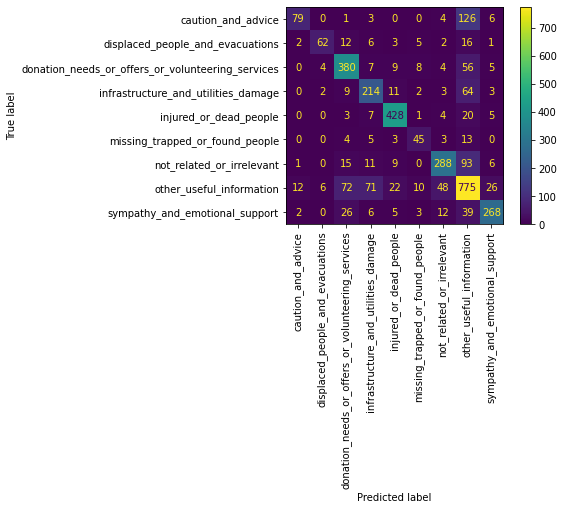

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation='vertical')

<h1> Bi-LSTM<h1>

In [16]:

embedding_layer = layers.Embedding(num_tokens, embedding_dim, embeddings_initializer= keras.initializers.Constant(embedding_matrix), trainable=False)
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Bidirectional(layers.LSTM(100))(embedded_sequences)
x = layers.Dropout(0.2)(x)
preds = layers.Dense(9, activation='softmax')(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 300)         645856200 
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               320800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 1809      
Total params: 646,178,809
Trainable params: 322,609
Non-trainable params: 645,856,200
_________________________________________________________________


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(data['label'])

X_train, X_test, y_train, y_test = train_test_split(tweets_indexed, y, test_size=0.2, random_state=42)

X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_val = tf.constant(y_test)

model.compile(
    loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(lr = 0.01), metrics=["acc"]
)
model.fit(X_train, y_train, batch_size=32, epochs=25, validation_data=(X_test, y_test), callbacks =[tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/25


C:\Users\xoelr\anaconda3\envs\mining\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


435/435 [==============================] - 15s 22ms/step - loss: 1.0423 - acc: 0.6573 - val_loss: 0.8777 - val_acc: 0.7089
Epoch 2/25
435/435 [==============================] - 9s 20ms/step - loss: 0.7886 - acc: 0.7363 - val_loss: 0.8343 - val_acc: 0.7296
Epoch 3/25
435/435 [==============================] - 11s 26ms/step - loss: 0.6971 - acc: 0.7641 - val_loss: 0.8267 - val_acc: 0.7293
Epoch 4/25
435/435 [==============================] - 10s 23ms/step - loss: 0.6110 - acc: 0.7925 - val_loss: 0.8712 - val_acc: 0.7172
Epoch 5/25
435/435 [==============================] - 8s 19ms/step - loss: 0.5316 - acc: 0.8186 - val_loss: 0.9030 - val_acc: 0.7175
Epoch 6/25
435/435 [==============================] - 9s 21ms/step - loss: 0.4639 - acc: 0.8396 - val_loss: 0.9756 - val_acc: 0.7068


In [18]:
from sklearn.metrics import classification_report

y_pred = []
for prediction in model.predict(X_test):
    y_pred.append(np.argmax(prediction))

print(classification_report(y_test, y_pred, target_names=le.classes_))

                                                   precision    recall  f1-score   support

                               caution_and_advice       0.70      0.32      0.44       219
                 displaced_people_and_evacuations       0.61      0.67      0.64       109
donation_needs_or_offers_or_volunteering_services       0.70      0.82      0.75       473
              infrastructure_and_utilities_damage       0.67      0.62      0.65       308
                           injured_or_dead_people       0.92      0.87      0.89       468
                  missing_trapped_or_found_people       0.82      0.38      0.52        73
                        not_related_or_irrelevant       0.70      0.71      0.70       423
                         other_useful_information       0.63      0.70      0.67      1042
                   sympathy_and_emotional_support       0.74      0.76      0.75       361

                                         accuracy                           0.71      34

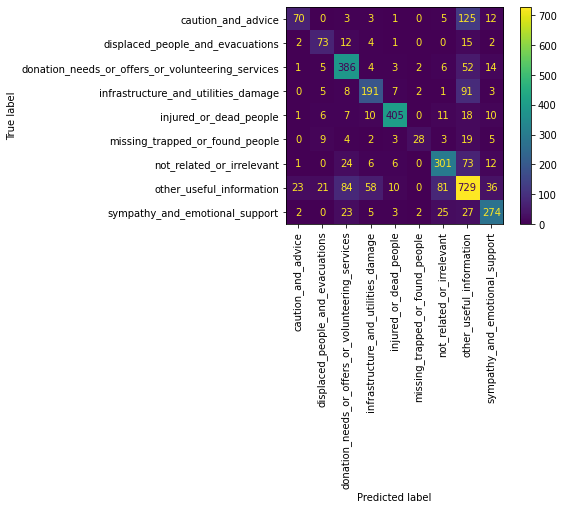

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation='vertical')